In [1]:
# kmeans clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'Mall_Customers.csv',index_col= 0)

In [3]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [4]:
data.shape

(200, 4)

In [5]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# values get stores as float which is used bt k-means algo it does not takes int64 as valid entry
data["Gender"]=data.Gender.map({'Female':0, "Male":0})

In [7]:
data.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [8]:
X = data.values[:,[2,3]]

Text(0, 0.5, 'WSSE')

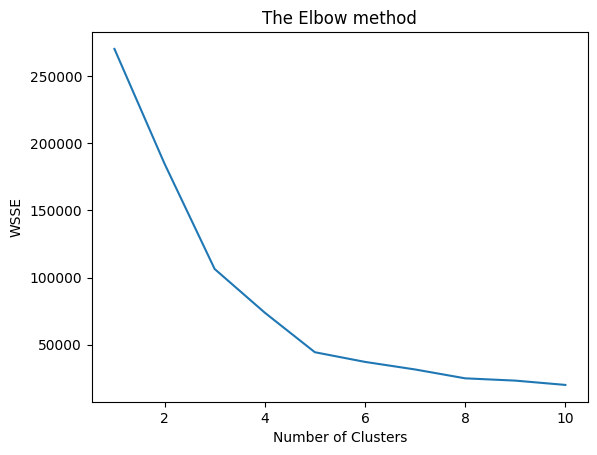

In [10]:
from sklearn.cluster import KMeans

wsse=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSSE')

In [11]:
kmeans = KMeans(n_clusters=5 , random_state=10)
Y_pred = kmeans.fit_predict(X)

In [12]:
Y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [13]:
data['clusters']=Y_pred
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,0,19,15,39,4
2,0,21,15,81,2
3,0,20,16,6,4
4,0,23,16,77,2
5,0,31,17,40,4
6,0,22,17,76,2
7,0,35,18,6,4
8,0,23,18,94,2
9,0,64,19,3,4


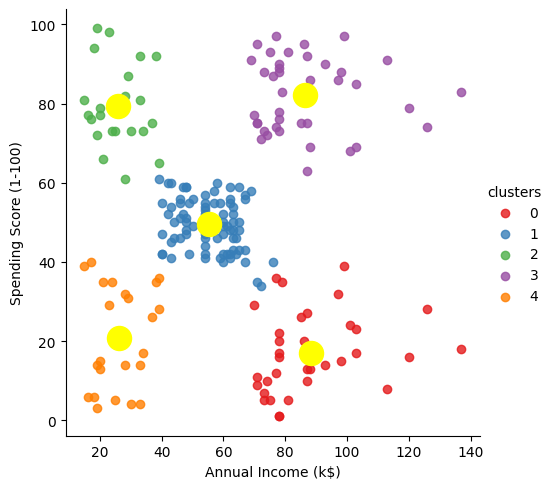

In [14]:
sns.lmplot(data=data , x='Annual Income (k$)',y = 'Spending Score (1-100)',
           fit_reg=False, # No Regression Line
           hue="clusters",palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s=300, c='yellow')
plt.show()

In [15]:
data['clusters'] = data.clusters.map({0:'standard', 1:'sensible', 2:'Target', 3:'careless', 4:'careful'})

In [16]:
data_new = data[data['clusters']=='Target']

In [17]:
data_new

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
2,0,21,15,81,Target
4,0,23,16,77,Target
6,0,22,17,76,Target
8,0,23,18,94,Target
10,0,30,19,72,Target
12,0,35,19,99,Target
14,0,24,20,77,Target
16,0,22,20,79,Target
18,0,20,21,66,Target


In [18]:
data_new.to_csv(r'finaldata.csv',index=True)